In [ ]:
import pandas as pd
import numpy as np
import joblib
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Descriptors import *
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.Lipinski import *
from rdkit.Chem.EState import *
from rdkit.Chem.GraphDescriptors import *
from rdkit.Chem.Graphs import *

def flatten_list(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten_list(item))
        else:
            flat_list.append(item)
    return flat_list
ni = 0

def properties_array(sSmiles):
    try:
        m = Chem.MolFromSmiles(sSmiles)
        p1 = AllChem.GetMorganFingerprintAsBitVect(m, 2, 512)
        p2 = Chem.rdMolDescriptors.GetMACCSKeysFingerprint(m)

        p3 = [1000*FpDensityMorgan1(m), 1000*FpDensityMorgan2(m), 1000*FpDensityMorgan3(m), ExactMolWt(m), HeavyAtomMolWt(m), 1000*MaxAbsPartialCharge(m), 1000*MaxPartialCharge(m), 1000*MinAbsPartialCharge(m), 1000*MinPartialCharge(m), NumRadicalElectrons(m), NumValenceElectrons(m),1000*CalcFractionCSP3(m),10*CalcKappa1(m),10*CalcKappa2(m),10*CalcKappa3(m),CalcLabuteASA(m),CalcNumAliphaticCarbocycles(m),CalcNumAliphaticHeterocycles(m),CalcNumAliphaticRings(m),CalcNumAmideBonds(m),CalcNumAromaticCarbocycles(m),CalcNumAromaticHeterocycles(m),CalcNumAromaticRings(m),CalcNumAtomStereoCenters(m),CalcNumBridgeheadAtoms(m),CalcNumHBA(m),CalcNumHBD(m),CalcNumHeteroatoms(m),CalcNumHeterocycles(m),CalcNumLipinskiHBA(m),CalcNumLipinskiHBD(m),CalcNumRings(m),CalcNumRotatableBonds(m),CalcNumSaturatedCarbocycles(m),CalcNumSaturatedHeterocycles(m),CalcNumSaturatedRings(m),CalcNumSpiroAtoms(m),CalcNumUnspecifiedAtomStereoCenters(m),CalcTPSA(m)]
        pa3 = np.array(p3, dtype=np.int16)
        
        p4 = [HeavyAtomCount(m), NHOHCount(m), NOCount(m),NumHAcceptors(m), NumHDonors(m), Chi0(m), Chi1(m)]
        
        p5 = [rdMolDescriptors.BCUT2D(m)]

        pa1 = np.array(list(p1), dtype=np.int16)
        pa2 = np.array(list(p2), dtype=np.int16)
        pa0 = np.concatenate([pa1, pa2])
        pa4 = np.array(p4, dtype=np.int16)
        pa5 = np.array(flatten_list(p5), dtype=np.int16)
        
        pa = np.concatenate([pa0,pa3, pa4,pa5])
        #print(len(pa))

        pa = np.array(pa)

        return pa, True
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
        return None, False

model_qy = joblib.load('./Models/orange_random.pkl') 
model_wl = joblib.load('./Models/blue_random.pkl')  
scaler_wl = joblib.load('./Models/scaler_modelwl.pkl')
scaler_qy = joblib.load('./Models/scaler_model-QY.pkl')

df = pd.read_csv("DATA/DB.csv")

In [ ]:
Chromophore = "c1ccc(C2c3ccccc3-c3ccccc32)cc1"
Solvent = "CCO"

pa, valid1 = properties_array(Chromophore)
pa2, valid2 = properties_array(Solvent)

features = np.concatenate([pa, pa2]).reshape(1, -1)
features_scaled_qy = scaler_qy.transform(features)
features_scaled_wl = scaler_wl.transform(features)

predicted_qy = model_qy.predict(features_scaled_qy)[0]
predicted_wl = model_wl.predict(features_scaled_wl)[0]

print("Chromophore:", Chromophore)
print("Solvent:", Solvent)
print("Predicted Wavelength (Wl):", predicted_wl, "nm")
print("Predicted Quantum Yield (QY):", predicted_qy)

Chromophore: c1ccc(C2c3ccccc3-c3ccccc32)cc1
Solvent: CCO
Predicted Wavelength (Wl): 357.4332944277944 nm
Predicted Quantum Yield (QY): 0.23748019598179596


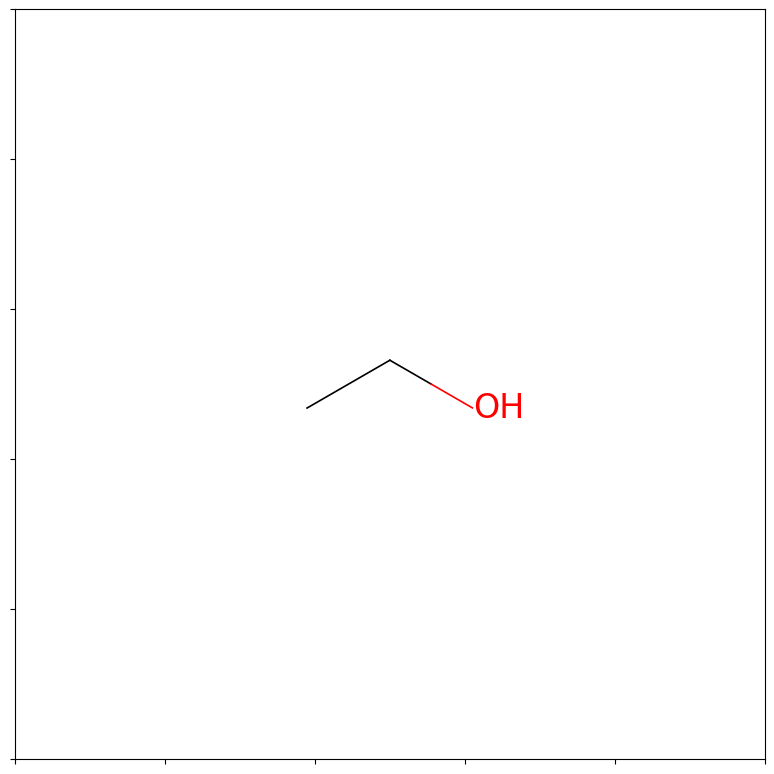

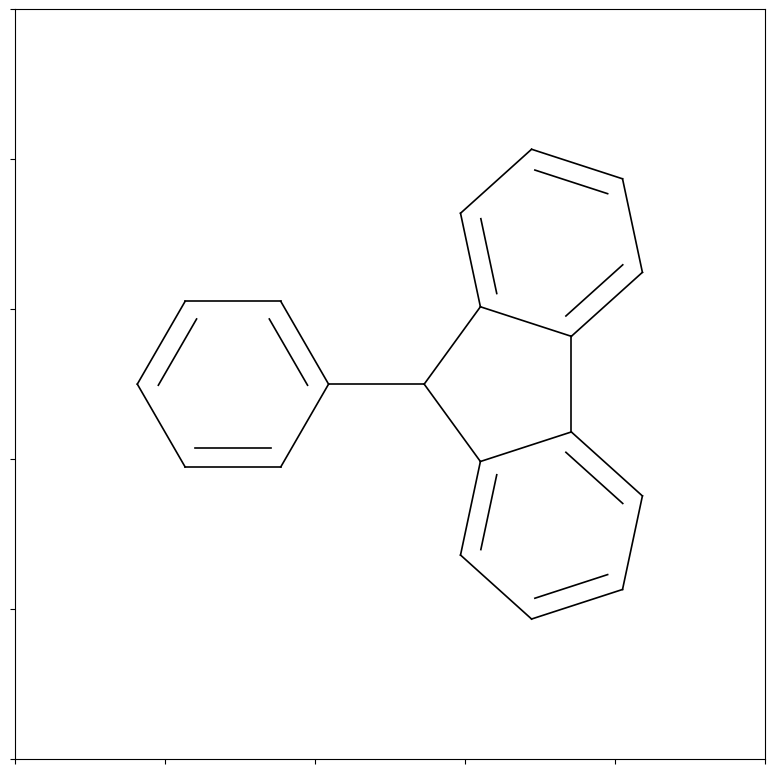

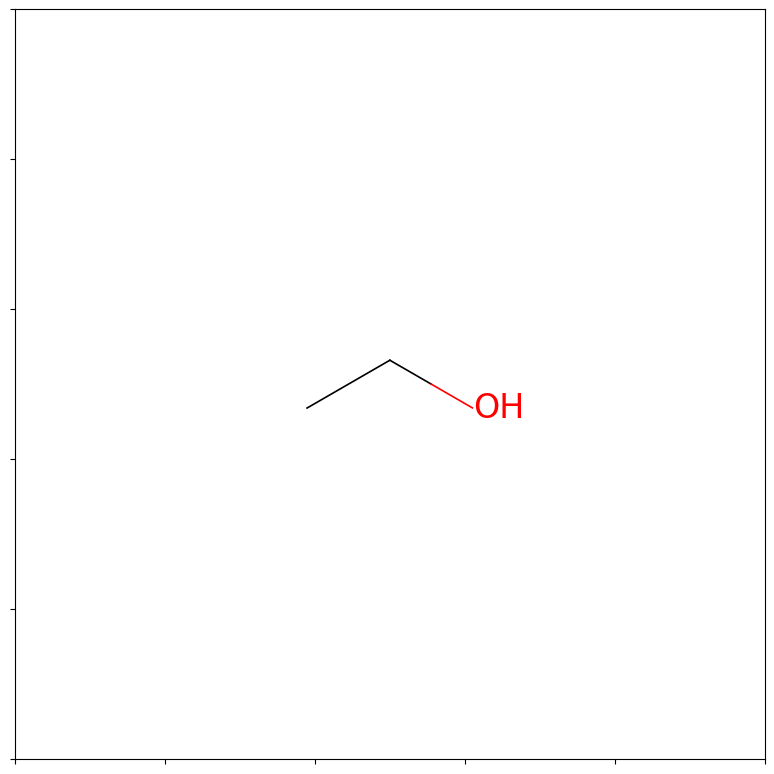

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import numpy as np

Chromophore = "c1ccc(C2c3ccccc3-c3ccccc32)cc1"
Solvent = "CCO"

chromophore_mol = Chem.MolFromSmiles(Chromophore)
solvent_mol = Chem.MolFromSmiles(Solvent)

Draw.MolToMPL(chromophore_mol)
Draw.MolToMPL(solvent_mol)